In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
training_log = 'training_log.txt'

with open(training_log) as f:
    content = f.readlines()

success_rates = list(map(lambda s: float(s[-5:-1]), content[::2]))
print(success_rates)

[0.83, 0.73, 0.5, 0.73, 0.73, 0.7, 0.7, 0.8, 0.3, 0.67, 0.67, 0.73, 0.43, 0.63, 0.67, 0.77, 0.57, 0.7, 0.4, 0.53, 0.57, 0.23, 0.43, 0.4, 0.57, 0.4, 0.47, 0.63, 0.53, 0.37, 0.57, 0.37, 0.33, 0.73, 0.53, 0.77, 0.67, 0.73, 0.5, 0.6, 0.6, 0.7, 0.33, 0.7, 0.83, 0.6, 0.6, 0.63, 0.4, 0.6, 0.77, 0.7, 0.43, 0.77, 0.6, 0.6, 0.6, 0.73, 0.57, 0.63, 0.77, 0.5, 0.57, 0.53, 0.63, 0.87, 0.6, 0.63, 0.43, 0.53, 0.77, 0.53, 0.5, 0.6, 0.5, 0.6, 0.33, 0.77, 0.53, 0.57, 0.67, 0.47, 0.67, 0.6, 0.53, 0.53, 0.6, 0.63, 0.4, 0.7, 0.43, 0.7, 0.37, 0.63, 0.53, 0.67, 0.53, 0.73, 0.7, 0.57, 0.7, 0.77, 0.57, 0.63, 0.57, 0.57, 0.47, 0.57, 0.77, 0.53, 0.4, 0.6, 0.53, 0.7, 0.63, 0.47, 0.8, 0.67, 0.53, 0.6, 0.57, 0.67, 0.83, 0.53, 0.7, 0.93, 0.53, 0.3, 0.53, 0.53, 0.47, 0.63, 0.5, 0.5, 0.47, 0.63, 0.8, 0.63, 0.7, 0.53, 0.47, 0.7, 0.5, 0.57, 0.57, 0.53, 0.93, 0.5, 0.5, 0.63, 0.7, 0.63, 0.67, 0.53, 0.83, 0.53, 0.9, 0.5, 0.5, 0.43, 0.7, 0.67, 0.53, 0.7, 0.4, 0.57, 0.43, 0.37, 0.4, 0.43, 0.33, 0.33, 0.63, 0.63, 0.67, 0.27, 0

In [64]:
class KMovingMeans:

    def __init__(self, k, init_value = 0):
        self._k = k
        self._data = [init_value] * k
        self._current_idx = 0
        self._mean = init_value

    def add(self, data):
        self._mean += (data - self._data[self._current_idx]) / self._k
        self._data[self._current_idx] = data
        self._current_idx = (self._current_idx + 1) % self._k

    @property
    def mean(self):
        return self._mean

class DoubleExponentialSmoothing:

    def __init__(self, level_decay, trend_decay, init_level = 0, init_trend = 0):
        self._level_decay = level_decay
        self._trend_decay = trend_decay
        self._level = init_level
        self._trend = init_trend
        self._target = init_level + init_trend

    def add(self, data):
        new_level = self._level_decay * data + (1 - self._level_decay) * self._target
        new_trend = self._trend_decay * (new_level - self._level) + (1 - self._trend_decay) * self._trend
        self._target = new_level + new_trend
        self._level = new_level
        self._trend = new_trend

    @property
    def level(self):
        return self._level

    @property
    def trend(self):
        return self._trend

    @property
    def target(self):
        return self._target
        

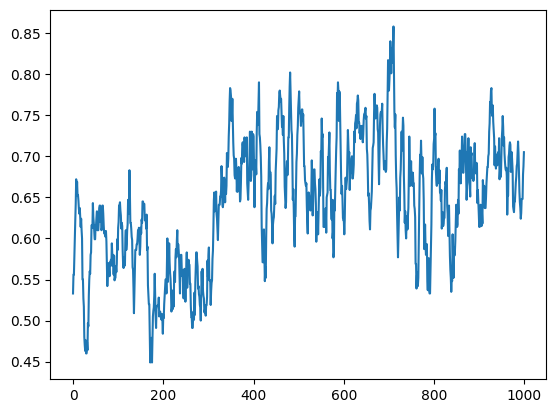

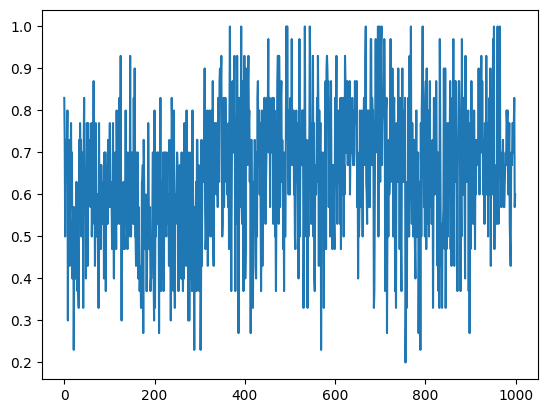

In [67]:
means = []

time_series = KMovingMeans(10, 0.5)
for r in success_rates:
    time_series.add(r)
    means.append(time_series.mean)

means = np.array(means)
plt.plot(means)
plt.show()
plt.plot(success_rates)

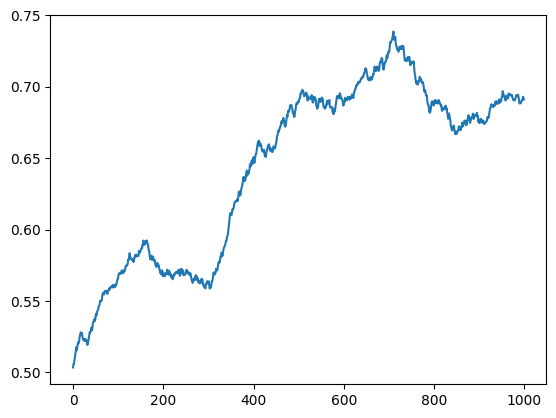

In [63]:
levels = []
target_values = []

time_series = DoubleExponentialSmoothing(0.01, 0.001, 0.5, 0.0001)
for r in success_rates:
    time_series.add(r)
    levels.append(time_series.level)
    target_values.append(time_series.target)
# plt.plot(levels)
# plt.show()
plt.plot(target_values)
plt.show()